In [1]:
import math
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.preprocessing import StandardScaler

In [2]:
np.set_printoptions(precision=3, suppress=True)

In [3]:
datos_2015 = pd.read_csv('../data/Marginacion_2015.csv')

In [4]:
datos_2015.head()

,CVE_ENT,NOM_ENT,POB_TOT,ANALF,SPRIM,OVSDE,OVSEE,OVSAE,VHAC,OVPT,PL.5000,PO2SM,IM,GM,LUGAR,A.O
0,1,Aguascalientes,1312544,2.60,11.89,0.67,0.30,0.81,21.86,0.75,25.16,34.60,-0.89,Bajo,28,2015
1,2,Baja California,3315766,1.96,10.46,0.26,0.47,2.82,23.03,1.15,10.35,22.85,-1.10,Muy bajo,30,2015
2,3,Baja California Sur,712029,2.51,11.59,0.38,1.14,7.15,26.23,4.08,15.62,22.37,-0.60,Bajo,22,2015
3,4,Campeche,899931,6.68,18.56,4.08,1.59,6.49,37.93,2.95,30.88,40.69,0.46,Alto,10,2015
4,5,Coahuila de Zaragoza,2954915,1.99,9.56,0.62,0.29,1.67,23.62,0.66,12.15,27.94,-1.10,Muy bajo,29,2015


In [5]:
variables = datos_2015[['ANALF', 'SPRIM', 'OVSDE', 'OVSEE', 
                        'OVSAE', 'VHAC', 'OVPT', 'PL.5000','PO2SM']]
variables

,ANALF,SPRIM,OVSDE,OVSEE,OVSAE,VHAC,OVPT,PL.5000,PO2SM
0,2.60,11.89,0.67,0.30,0.81,21.86,0.75,25.16,34.60
1,1.96,10.46,0.26,0.47,2.82,23.03,1.15,10.35,22.85
2,2.51,11.59,0.38,1.14,7.15,26.23,4.08,15.62,22.37
3,6.68,18.56,4.08,1.59,6.49,37.93,2.95,30.88,40.69
4,1.99,9.56,0.62,0.29,1.67,23.62,0.66,12.15,27.94
5,3.90,15.24,0.38,0.38,0.96,25.65,2.45,14.47,31.18
6,14.98,31.71,2.90,2.49,13.45,44.46,11.78,57.86,62.46
7,2.67,12.65,1.40,1.81,2.39,22.16,1.76,17.05,34.77
8,1.49,6.62,0.04,0.04,1.10,19.19,0.47,0.67,28.26
9,3.17,14.50,3.68,2.63,3.26,24.58,4.33,36.19,39.16


In [6]:
X_scaled = StandardScaler().fit_transform(variables)

var_cov = np.cov(X_scaled.T)
pd.DataFrame(var_cov)

,0,1,2,3,4,5,6,7,8
0,1.032258,0.984352,0.566318,0.644919,0.851142,0.827696,0.918771,0.817096,0.840789
1,0.984352,1.032258,0.545993,0.644721,0.790763,0.769895,0.855742,0.834624,0.850514
2,0.566318,0.545993,1.032258,0.479088,0.385603,0.567678,0.483757,0.449856,0.499052
3,0.644919,0.644721,0.479088,1.032258,0.668808,0.520709,0.752481,0.576100,0.542252
4,0.851142,0.790763,0.385603,0.668808,1.032258,0.681473,0.910443,0.721711,0.626011
5,0.827696,0.769895,0.567678,0.520709,0.681473,1.032258,0.742381,0.582337,0.711288
6,0.918771,0.855742,0.483757,0.752481,0.910443,0.742381,1.032258,0.684937,0.679909
7,0.817096,0.834624,0.449856,0.576100,0.721711,0.582337,0.684937,1.032258,0.787589
8,0.840789,0.850514,0.499052,0.542252,0.626011,0.711288,0.679909,0.787589,1.032258


In [7]:
def sign(x):
    """
    Helper function for computing sign of real number x.
    """
    if x >=0:
        return 1
    else:
        return -1

def compute_cos_sin_Jacobi_rotation(Ak, idx1, idx2):
    """
    Helper function for computing entries of Jacobi rotation.
    Args:
        Ak (numpy ndarray): Matrix of iteration k in Jacobi rotation method.
        idx1 (int): index for rows in Jacobi rotation matrix.
        idx2 (int): index for columns in Jacobi rotation matrix.
    Returns:
        c (float): value of cos of theta for Jacobi rotation matrix.
        s (float): value of sin of theta for Jacobi rotation matrix.
    """
    if np.abs(Ak[idx1,idx2]) >= np.finfo(float).eps:
        tau = (Ak[idx2, idx2] - Ak[idx1, idx1])/(2*Ak[idx1, idx2])
        t_star = sign(tau)/(np.abs(tau) + np.sqrt(1+tau**2))
        c = 1/np.sqrt(1+t_star**2)
        s = c*t_star
    else: #no rotation is performed
        c = 1
        s = 0
    return (c,s)
def compute_Jacobi_rotation(Ak, idx1, idx2):
    """
    Compute Jacobi rotation matrix.
    Args:
        Ak (numpy ndarray): Matrix of iteration k in Jacobi rotation method.
        idx1 (int): index for rows in Jacobi rotation matrix.
        idx2 (int): index for columns in Jacobi rotation matrix.
    Returns:
        J (numpy ndarray): Jacobi rotation matrix.
    """
    c,s = compute_cos_sin_Jacobi_rotation(Ak, idx1, idx2)
    m,n = Ak.shape
    J = np.eye(m)
    J[idx1, idx1] = J[idx2, idx2] = c
    J[idx1, idx2] = s
    J[idx2, idx1] = -s
    return J

def off(A):
    """
    Frobenius norm without the main diagonal
    Args:
        Ak (numpy ndarray): Matrix for getting the Frobenius norm.
    Returns:
        s: The Frobenius norm without the sum of the main diagonal indices.
    """
    s = 0
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            if j != i:
                s1 = math.sqrt(A[i,j]**2)
                s = s + s1
    return s

def compute_Jacobi_rotation(Ak, idx1, idx2):
    """
    Compute Jacobi rotation matrix.
    Args:
        Ak (numpy ndarray): Matrix of iteration k in Jacobi rotation method.
        idx1 (int): index for rows in Jacobi rotation matrix.
        idx2 (int): index for columns in Jacobi rotation matrix.
    Returns:
        J (numpy ndarray): Jacobi rotation matrix.
    """
    c,s = compute_cos_sin_Jacobi_rotation(Ak, idx1, idx2)
    m,n = Ak.shape
    J = np.eye(m)
    J[idx1, idx1] = J[idx2, idx2] = c
    J[idx1, idx2] = s
    J[idx2, idx1] = -s
    return J

def compute_Jacobi_iterative(A, sweeps, tol):
    """
    Compute Jacobi rotation matrix.
    Args:
        Ak (numpy ndarray): Matrix of iteration k in Jacobi rotation method.
        idx1 (int): index for rows in Jacobi rotation matrix.
        idx2 (int): index for columns in Jacobi rotation matrix.
    Returns:
        J (numpy ndarray): Jacobi rotation matrix.
    """
    Ak = A.copy()
    for n in range(sweeps):
        for i in range(Ak.shape[0]):
            j = i + 1
            for m in range(Ak.shape[0]-i-1):
                if off(Ak) > tol*np.linalg.norm(Ak):
                    J = compute_Jacobi_rotation(Ak, i, j)
                    Ak = J.T@Ak@J
                    j += 1
                    
    return Ak



def compute_Jacobi_eigenvectors(A, tol, max_sweeps):
    """
    Compute Jacobi rotation matrix.
    Args:
        Ak (numpy ndarray): Matrix of iteration k in Jacobi rotation method.
        idx1 (int): index for rows in Jacobi rotation matrix.
        idx2 (int): index for columns in Jacobi rotation matrix.
    Returns:
        Q (numpy ndarray): Matrix that contain A's eigenvectors.
    """
    A_k = A.copy()
    m,n = A_k.shape
    Q = np.eye(m)
    sweeps = 0
    while (off(A_k) > tol*np.linalg.norm(A_k) and sweeps < max_sweeps + 1):
        sweeps += 1
        for i in range(A_k.shape[0]):
            j = i + 1
            for m in range(A_k.shape[0]-i-1):
                J = compute_Jacobi_rotation(A_k, i, j)
                A_k = J.T@A_k@J
                Q = Q @ J
                j += 1
                
    return Q 

In [8]:
eg_val = compute_Jacobi_iterative(var_cov, 4,10**(-8))
eg_val = pd.DataFrame(eg_val)
eg_val = eg_val.round(3)
eg_val

,0,1,2,3,4,5,6,7,8
0,0.031,0.000,-0.000,-0.000,-0.000,0.000,-0.00,-0.000,0.000
1,0.000,6.628,-0.000,-0.000,0.000,0.000,-0.00,-0.000,0.000
2,-0.000,-0.000,0.756,-0.000,0.000,-0.000,0.00,-0.000,0.000
3,-0.000,-0.000,-0.000,0.649,-0.000,0.000,-0.00,0.000,0.000
4,-0.000,0.000,0.000,-0.000,0.153,-0.000,0.00,-0.000,-0.000
5,0.000,0.000,-0.000,0.000,-0.000,0.198,0.00,0.000,0.000
6,-0.000,-0.000,0.000,-0.000,0.000,0.000,0.08,0.000,0.000
7,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.00,0.482,-0.000
8,0.000,0.000,0.000,0.000,0.000,0.000,-0.00,-0.000,0.314


In [9]:
eg_val.to_csv('../data/Diagonal_2015.csv', index = False)

In [10]:
a = []
for i in range(0,9):
    a.append(pd.DataFrame(eg_val).loc[i,i].round(4))
    
eig = sorted(a, reverse=True)
eig

[6.628, 0.756, 0.649, 0.482, 0.314, 0.198, 0.153, 0.08, 0.031]

In [11]:
values, vectors = np.linalg.eig(var_cov)
sorted(values.round(4), reverse=True)

[6.6282, 0.7565, 0.6488, 0.4816, 0.3139, 0.1978, 0.1531, 0.0797, 0.0307]

In [12]:
e_vectors = compute_Jacobi_eigenvectors(var_cov,1e-8,6)


In [13]:
projected_1 = e_vectors[0].T@X_scaled.T
projected_2 = e_vectors[1].T@X_scaled.T
projected_3 = e_vectors[2].T@X_scaled.T
projected_4 = e_vectors[3].T@X_scaled.T
projected_5 = e_vectors[4].T@X_scaled.T
projected_6 = e_vectors[6].T@X_scaled.T
projected_7 = e_vectors[7].T@X_scaled.T
projected_8 = e_vectors[8].T@X_scaled.T
projected_9 = e_vectors[5].T@X_scaled.T


res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res['PC3'] = projected_3
res['PC4'] = projected_4
res['PC5'] = projected_5
res['PC6'] = projected_6
res['PC7'] = projected_7
res['PC8'] = projected_8
res['PC9'] = projected_9
res['GM'] = datos_2015['GM']
res['IM'] = datos_2015['IM']

res = res.round(3)
res

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,GM,IM
0,0.270,-0.114,-0.261,-1.613,0.324,-0.846,-1.391,0.568,0.290,Bajo,-0.89
1,-0.335,-0.960,-1.055,-1.758,0.792,-0.626,-1.423,-0.091,0.652,Muy bajo,-1.10
2,-0.653,-1.395,-1.212,-0.916,0.827,-0.286,-0.266,-0.324,0.042,Bajo,-0.60
3,-0.778,0.424,0.528,1.182,-0.020,0.123,0.655,-0.498,0.481,Alto,0.46
4,-0.259,-0.628,-0.688,-1.726,0.811,-0.667,-1.554,0.304,0.802,Muy bajo,-1.10
5,-0.287,0.037,-0.729,-1.351,0.138,0.004,-1.317,0.092,0.426,Bajo,-0.73
6,-0.084,2.235,0.304,3.807,-1.097,2.119,3.455,-0.362,-1.884,Muy alto,2.41
7,-0.281,-0.965,-0.243,-0.200,0.356,-0.785,-1.642,-0.002,-0.457,Bajo,-0.60
8,0.010,-0.938,-0.980,-2.138,1.361,-0.530,-2.333,0.602,0.821,Muy bajo,-1.45
9,-0.222,-1.289,0.566,0.912,-0.562,-0.802,-0.635,0.151,-0.977,Medio,0.05


In [14]:
explained_variances = []
for i in range (len(eig)):
    explained_variances.append(eig[i]/np.sum(eig))
    
explained_variances = [round(num, 3) for num in explained_variances] 
print(explained_variances)

[0.713, 0.081, 0.07, 0.052, 0.034, 0.021, 0.016, 0.009, 0.003]


/home/miuser/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='PC2', ylabel='PC4'>

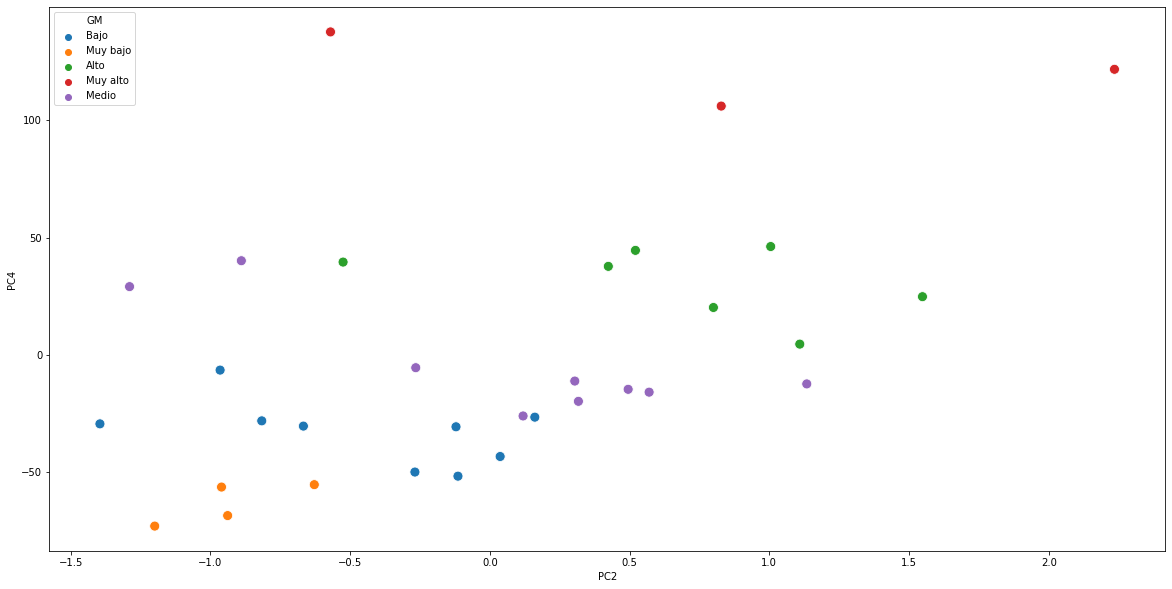

In [19]:
plt.figure(figsize=(20, 10))
sns.scatterplot(res['PC2'], res['PC4'] * len(res), hue=res['GM'], s=100)

Para ese año el primer y tercer compoente principal son los que mejos agrupan las observaciones por grado de marginación

In [20]:
res.to_csv('../data/PCA_2015.csv', index = False)

In [21]:
ultimo = res[['PC1', 'IM', 'GM']] 
ultimo.to_csv('../data/IM_PCA_2015.csv', index = False)

In [22]:
ultimo.sort_values(by='PC1')

,PC1,IM,GM
22,-1.550,-0.37,Medio
3,-0.778,0.46,Alto
27,-0.728,-0.62,Bajo
25,-0.704,-0.70,Bajo
2,-0.653,-0.60,Bajo
18,-0.467,-1.39,Muy bajo
28,-0.366,-0.20,Medio
1,-0.335,-1.10,Muy bajo
14,-0.300,-0.57,Bajo
5,-0.287,-0.73,Bajo
